In [1]:
import numpy as np
import matplotlib.pyplot as plt

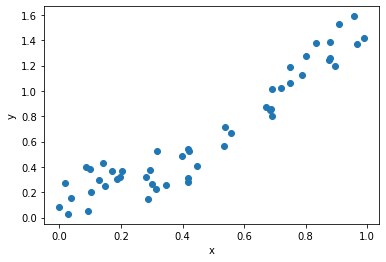

In [2]:
np.random.seed(1)

X = np.random.rand(50,1)

y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3*X + \
    0.4*np.random.rand(50,1) # no data in world is perfect


fig = plt.figure()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

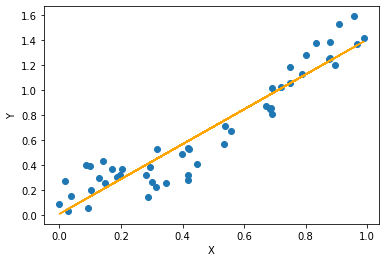

0.8919326382437994


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

output = model.predict(X)


fig = plt.figure()

plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction", c='orange')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

print(model.score(X, y))

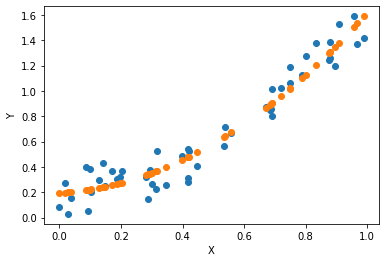

0.937213227713278


In [7]:
from sklearn.preprocessing import StandardScaler

X_deg2 = np.hstack([X, X**2])


model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)

output = model_deg2.predict(X_deg2)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

print(model_deg2.score(X_deg2, y))


In [10]:
print(X.shape, y.shape)
print(X_deg2.shape)

(50, 1) (50, 1)
(50, 2)


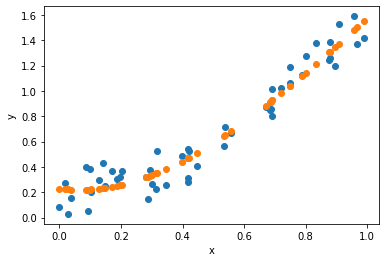

0.9384895307987051


In [11]:
X_deg3 = np.hstack([X, X**2, X**3])

model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)

output = model_deg3.predict(X_deg3)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")

plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(model_deg3.score(X_deg3, y))

(50, 4)


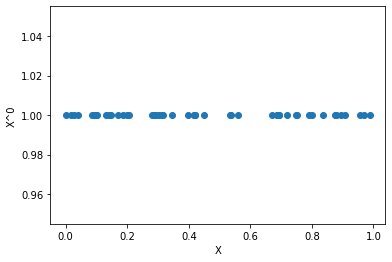

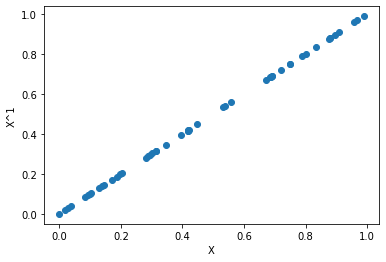

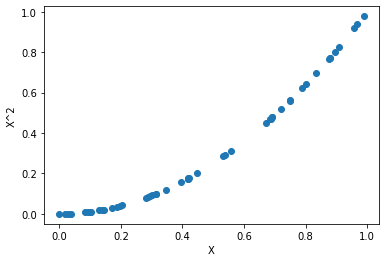

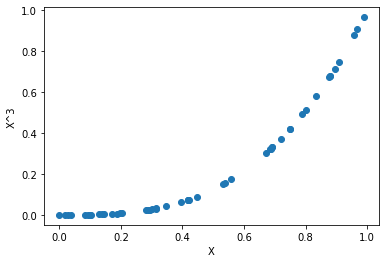

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
print(X_poly.shape) # shape of the generated features 4 features

n_features = X_poly.shape[1]

for degree in range(n_features):
    fig = plt.figure()
    plt.scatter(X, X_poly[:,degree])
    plt.xlabel("X")
    plt.ylabel(f"X^{degree}")
    plt.show()

In [13]:
X_poly[:5]

array([[1.00000000e+00, 4.17022005e-01, 1.73907352e-01, 7.25231927e-02],
       [1.00000000e+00, 7.20324493e-01, 5.18867376e-01, 3.73752880e-01],
       [1.00000000e+00, 1.14374817e-04, 1.30815988e-08, 1.49620548e-12],
       [1.00000000e+00, 3.02332573e-01, 9.14049845e-02, 2.76347041e-02],
       [1.00000000e+00, 1.46755891e-01, 2.15372915e-02, 3.16072440e-03]])

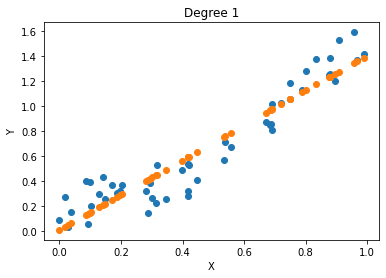

0.8919326382437994


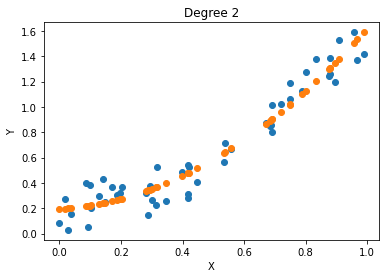

0.937213227713278


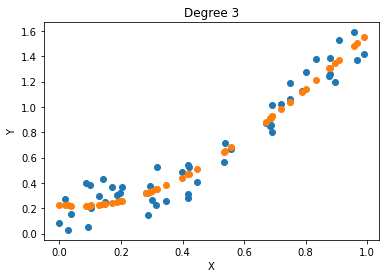

0.9384895307987051


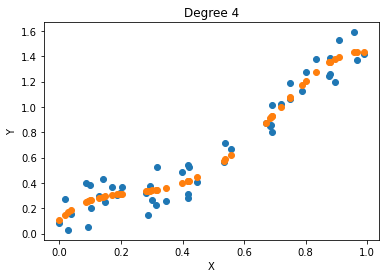

0.950995835560793


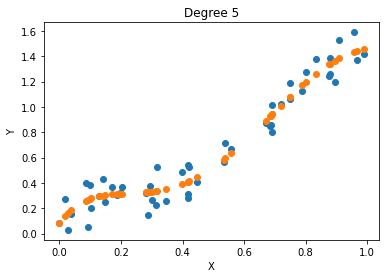

0.9515258649694076


In [14]:
from sklearn.preprocessing import PolynomialFeatures

scores = []
for i in range(1, 6):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    
    model = LinearRegression()
    model.fit(X_poly_scaled, y)
    output = model.predict(X_poly_scaled)
    
    fig = plt.figure()
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()
    
    score = model.score(X_poly_scaled, y)
    print(score)
    scores.append(score)

In [15]:
scores

[0.8919326382437994,
 0.937213227713278,
 0.9384895307987051,
 0.950995835560793,
 0.9515258649694076]

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degree = 50 # number of data-points
scores = []
for i in range(0, degree):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled, y)
    output = model.predict(X_poly_scaled)
    scores.append(model.score(X_poly_scaled, y))

best_deg = np.argmax(scores)
print(best_deg, scores[best_deg])

31 0.9684331040517228


**How does it perform with degree=5**

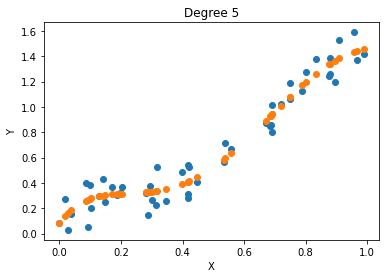

0.9515258649694076


In [17]:
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)

model = LinearRegression()
model.fit(X_poly_scaled, y)
output = model.predict(X_poly_scaled)

fig = plt.figure()
plt.scatter(X, y, label="ground truth")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Degree {5}")
plt.show()
print(model.score(X_poly_scaled, y))

**How does it perform with degree=31**

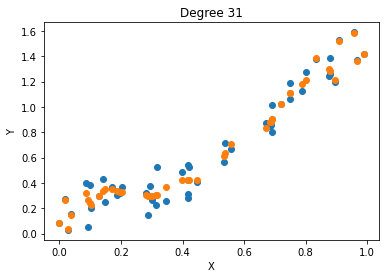

0.9684331040517228


In [18]:
degree = 31
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)
model = LinearRegression()
model.fit(X_poly_scaled, y)
output = model.predict(X_poly_scaled)
fig = plt.figure()
plt.scatter(X, y, label="ground truth")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Degree {degree}")
plt.show()
print(model.score(X_poly_scaled, y))


## **Train Test Split**

In [21]:
# lets first generate a dataset of 100 points this time
np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

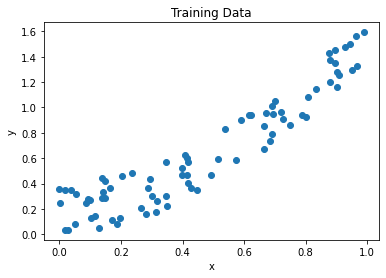

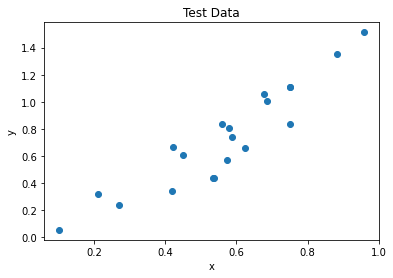

In [22]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data")
plt.show()

In [23]:
degree = 50 # number of data-points
scores = []
for i in range(0, degree):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X_train)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled, y_train)
    output = model.predict(X_poly_scaled)
    scores.append(model.score(X_poly_scaled, y_train))

max_idx = np.argmax(scores)
print(max_idx, scores[max_idx])

40 0.9440974271136691


In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
degree=5
polyreg_scaled = make_pipeline(PolynomialFeatures(5), scaler, LinearRegression())
polyreg_scaled.fit(X_train,y_train)

print(polyreg_scaled.score(X_train, y_train))
print(polyreg_scaled.score(X_test, y_test))

0.9214962587812688
0.865626271039198


In [27]:
degree=40
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train,y_train)
display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

0.9440974271136691

0.7809514766504873

## **Underfitting Overfitting**

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degrees = 40 # number of data-points
train_scores = []
test_scores = []

for degree in range(1, degrees):
    scaler = StandardScaler()
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

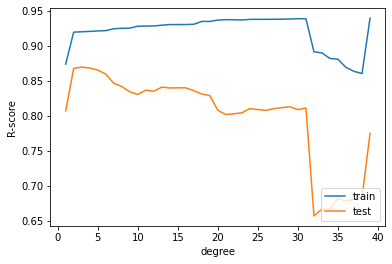

In [35]:
plt.figure()
plt.plot(list(range(1, 40)), train_scores, label="train")
plt.plot(list(range(1, 40)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()

In [36]:
test_scores[:5]

[0.8073308228555811,
 0.8679916102398835,
 0.8698705682559444,
 0.8685114908379858,
 0.865626271039198]